In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
  
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\\Ai engineering\\udemy Ml\\CSV's\\Algerian_forest_fires_cleaned_dataset.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
## Splitting

X= df.drop(['FWI'],axis=1)
y=df['FWI']

In [10]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=120)

In [11]:
## Feature Selection based on corr


X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.654349,-0.273118,-0.246088,0.662666,0.466981,0.321158,0.610241,0.422758,0.495230,0.256369
RH,-0.654349,1.000000,0.171143,0.184876,-0.629434,-0.366887,-0.163670,-0.685953,-0.298046,-0.419197,-0.393320
Ws,-0.273118,0.171143,1.000000,0.171076,-0.075050,0.034297,0.121121,0.058991,0.067950,-0.029660,-0.222786
Rain,-0.246088,0.184876,0.171076,1.000000,-0.479427,-0.265515,-0.280032,-0.321865,-0.272978,-0.373023,-0.014134
FFMC,0.662666,-0.629434,-0.075050,-0.479427,1.000000,0.616374,0.509365,0.734563,0.590555,0.762293,0.243078
DMC,0.466981,-0.366887,0.034297,-0.265515,0.616374,1.000000,0.881732,0.671872,0.983214,0.618858,0.095693
DC,0.321158,-0.163670,0.121121,-0.280032,0.509365,0.881732,1.000000,0.492425,0.951329,0.543005,-0.200394
ISI,0.610241,-0.685953,0.058991,-0.321865,0.734563,0.671872,0.492425,1.000000,0.618713,0.724427,0.249486
BUI,0.422758,-0.298046,0.067950,-0.272978,0.590555,0.983214,0.951329,0.618713,1.000000,0.603769,-0.018217
Classes,0.495230,-0.419197,-0.029660,-0.373023,0.762293,0.618858,0.543005,0.724427,0.603769,1.000000,0.151257


In [12]:
X_train.corr().iloc[1]

Temperature   -0.654349
RH             1.000000
Ws             0.171143
Rain           0.184876
FFMC          -0.629434
DMC           -0.366887
DC            -0.163670
ISI           -0.685953
BUI           -0.298046
Classes       -0.419197
Region        -0.393320
Name: RH, dtype: float64

<Axes: >

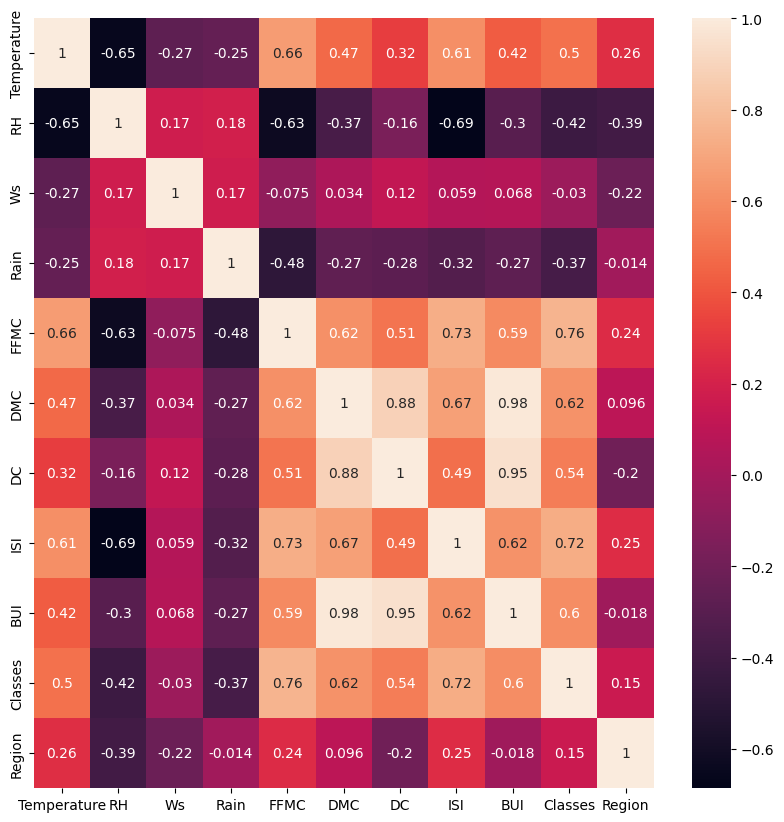

In [13]:
import seaborn as sns
plt.figure(figsize=(10,10))
a=X_train.corr()

sns.heatmap(a,annot=True)

In [14]:
def correlation(ds,thresh):
  col_name=set()
  corr_mat=ds.corr()
  for i in range(len(corr_mat.columns)):
    for j in range(i):
      if abs(corr_mat.iloc[i,j]) > thresh:
        col = corr_mat.columns[i]
        col_name.add(col)
        
  return col_name

In [15]:
f=correlation(X_train,0.85)

In [16]:
X_train=X_train.drop(f,axis=1)
X_test=X_test.drop(f,axis=1)


In [17]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()


X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

<Axes: >

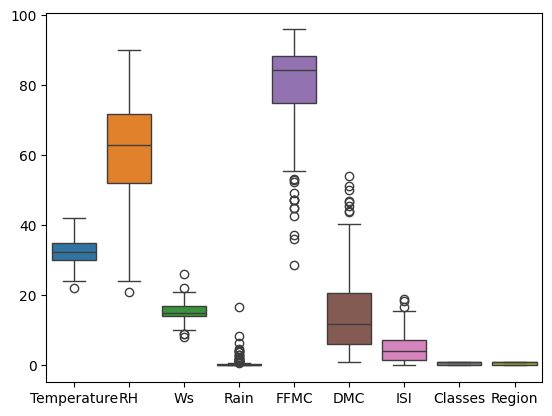

In [18]:
sns.boxplot(X_train)

<Axes: >

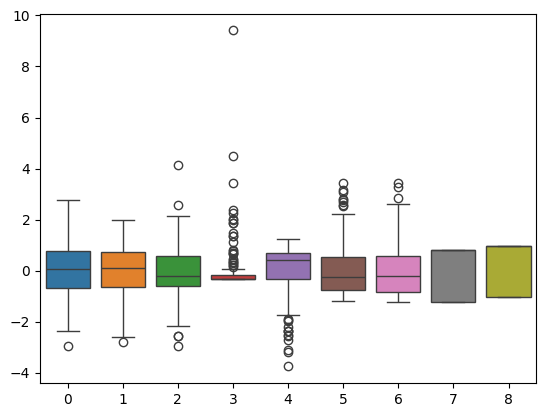

In [19]:
sns.boxplot(X_train_scaled)

## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from essentials import calculate
linear=LinearRegression()
linear.fit(X_train_scaled,y_train)
pred=linear.predict(X_test_scaled)
calculate(pred=pred,real=y_test,X_test=X_test_scaled)

**********
MSE: 1.201720584600195
MAE: 0.8321617329869981
RMSE: 1.096230169535666
R2 Score: 0.9813924051724761
Adjusted R2 Score: 0.9787341773399726
**********


## Lasso Regression

In [21]:
from sklearn.linear_model import Lasso


lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
pred=lasso.predict(X_test_scaled)
calculate(pred,y_test,X_test_scaled)


**********
MSE: 3.390043563759597
MAE: 1.3755354876600283
RMSE: 1.8412070942073837
R2 Score: 0.9475081330132324
Adjusted R2 Score: 0.9400092948722657
**********


## LassoCV

In [22]:
from sklearn.linear_model import LassoCV


lasso=LassoCV(cv=30)
lasso.fit(X_train_scaled,y_train)
pred=lasso.predict(X_test_scaled)
calculate(pred,y_test,X_test_scaled)


**********
MSE: 1.3232612513277773
MAE: 0.8824718447454529
RMSE: 1.1503309312227405
R2 Score: 0.9795104539847244
Adjusted R2 Score: 0.9765833759825421
**********


## Ridge Regression

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X_train_scaled,y_train)
pred=ridge.predict(X_test_scaled)
calculate(pred,y_test,X_test_scaled)

**********
MSE: 1.2374619469671908
MAE: 0.8516045819886553
RMSE: 1.11241266936654
R2 Score: 0.9808389813582955
Adjusted R2 Score: 0.9781016929809091
**********


## Ridge CV

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X_train_scaled,y_train)
pred=ridge.predict(X_test_scaled)
calculate(pred,y_test,X_test_scaled)

**********
MSE: 1.2374619469671908
MAE: 0.8516045819886553
RMSE: 1.11241266936654
R2 Score: 0.9808389813582955
Adjusted R2 Score: 0.9781016929809091
**********


## Elastic Regression

In [25]:
from sklearn.linear_model import ElasticNetCV

elastic = ElasticNetCV()
elastic.fit(X_train_scaled,y_train)
pred=elastic.predict(X_test_scaled)
calculate(pred=pred,real=y_test,X_test=X_test_scaled)

**********
MSE: 1.2984258096699965
MAE: 0.8821345472130306
RMSE: 1.1394848878638086
R2 Score: 0.979895009131447
Adjusted R2 Score: 0.9770228675787965
**********


In [26]:
scale

StandardScaler()

In [27]:
ridge

Ridge()

In [28]:
import pickle

pickle.dump(scale,open('scale.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [29]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
46,29,70,14,0.0,82.8,9.4,3.2,1,0
76,36,61,18,0.3,80.2,11.7,2.8,1,0
146,34,70,16,0.0,86.0,12.8,5.4,1,1
190,39,43,12,0.0,91.7,16.5,9.6,1,1
13,30,78,20,0.5,59.0,4.6,1.0,0,0
...,...,...,...,...,...,...,...,...,...
126,32,60,14,0.2,77.1,6.0,1.8,0,1
223,30,73,14,0.0,79.2,6.5,2.1,0,1
158,38,43,13,0.5,85.0,13.0,4.1,1,1
0,29,57,18,0.0,65.7,3.4,1.3,0,0
